Q.1. Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Occupations

Step 1. Import the necessary libraries

In [13]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

Step 3. Assign it to a variable called users

In [15]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',sep = '|')

In [16]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 4. Discover what is the mean age per occupation

In [25]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [31]:
def gender(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0 
    
    
users['gender_n'] = users['gender'].apply(gender)

a = users.groupby('occupation')['gender_n'].sum() / users.occupation.value_counts() * 100
a.sort_values(ascending=False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [28]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [29]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [34]:
a = users.groupby(['occupation','gender']).agg({'gender':'count'})
b = users.groupby(['occupation']).agg('count')
c = a.div(b,level='occupation') * 100
c.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Q.2. Euro Teams

Step 1. Import the necessary libraries

In [35]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv)

Step 3. Assign it to a variable called euro12

In [36]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

In [38]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column

In [39]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [41]:
euro12.Team.nunique()

16

Step 6. What is the number of columns in the dataset?

In [43]:
euro12.shape[1]

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [44]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [45]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [49]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [50]:
discipline['Yellow Cards'].mean()

7.4375

Step 10. Filter teams that scored more than 6 goals

In [51]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [52]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [53]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 13. Select all columns except the last 3

In [55]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [56]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Q.3. Housing

Step 1. Import the necessary libraries

In [57]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows:

 1.The first a random number from 1 to 4
 2.The second a random number from 1 to 3
 3.The third a random number from 10,000 to 30,000

In [58]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     3
1     1
2     2
3     2
4     1
     ..
95    4
96    4
97    4
98    3
99    2
Length: 100, dtype: int64 0     2
1     2
2     3
3     2
4     3
     ..
95    3
96    2
97    3
98    3
99    2
Length: 100, dtype: int64 0     23946
1     28987
2     14673
3     24175
4     13738
      ...  
95    23420
96    24510
97    19583
98    24899
99    29482
Length: 100, dtype: int64


Step 3. Create a DataFrame by joinning the Series by column

In [59]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,3,2,23946
1,1,2,28987
2,2,3,14673
3,2,2,24175
4,1,3,13738


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [61]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'})
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,23946
1,1,2,28987
2,2,3,14673
3,2,2,24175
4,1,3,13738


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [63]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,3
1,1
2,2
3,2
4,1
...,...
95,23420
96,24510
97,19583
98,24899


Step 6. Ops it seems it is going only until index 99. Is it true?

In [64]:
len(bigcolumn)  #No. As we can see length is 300. So, it is going par 99.

300

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [65]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,1
2,2
3,2
4,1
...,...
295,23420
296,24510
297,19583
298,24899


Q.4. Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

In [110]:
import pandas as pd
import numpy as np
import datetime

Step 2. Import the dataset from the attached file wind.txt

In [111]:
pd.read_csv("Wind.txt")

,Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
0,61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 1...
1,61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 1...
2,61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 1...
3,61 1 4 10.58 6.63 11.75 4.58 4.54 2.88 ...
4,61 1 5 13.33 13.25 11.42 6.17 10.71 8.21 1...
...,...
6569,78 12 27 17.58 16.96 17.62 8.08 13.21 11.67 1...
6570,78 12 28 13.21 5.46 13.46 5.00 8.12 9.42 1...
6571,78 12 29 14.00 10.29 14.42 8.71 9.71 10.54 1...
6572,78 12 30 18.50 14.04 21.29 9.13 12.75 9.71 1...


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [145]:
data = pd.read_csv("Wind.txt", sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [146]:
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [147]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data = data.set_index('Yr_Mo_Dy')
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [149]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [150]:
x=data.count()
print("Total Non-missing values are :",x.sum())

Total Non-missing values are : 78857


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [151]:
y = data.mean()
y.mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [152]:
def loc_stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(loc_stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [153]:
day_stats = data.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [154]:
january = data[data.index.month == 1]
print ("January windspeeds:")
print (january.mean())

January windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


Step 12. Downsample the record to a yearly frequency for each location.

In [155]:
print( "Yearly:\n", data.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Yr_Mo_Dy                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

Step 13. Downsample the record to a monthly frequency for each location.

In [156]:
print ("Monthly:", data.resample('M').mean())

Monthly:                   RPT        VAL        ROS       KIL        SHA        BIR  \
Yr_Mo_Dy                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161

Step 14. Downsample the record to a weekly frequency for each location.

In [157]:
print ("Weekly:", data.resample('W').mean())

Weekly:                   RPT        VAL        ROS        KIL        SHA        BIR  \
Yr_Mo_Dy                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [158]:
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
print (stats1)

              RPT         VAL         ROS         KIL         SHA         BIR  \
count  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
mean    12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
std      3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   
min      3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
25%      9.884286    8.277857    9.613929    4.742857    8.248571    5.211071   
50%     12.291429   10.486429   11.490000    6.165714   10.254286    6.933571   
75%     14.547143   12.757857   13.457143    7.584286   12.627143    8.842500   
max     24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   

              DUB         CLA         MUL         CLO         BEL         MAL  
count  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
mean     9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
std      3.308180    2.853029 

Q.5.

Step 1. Import the necessary libraries

In [159]:
import pandas as pd

Step 2. Import the dataset from this address (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)

Step 3. Assign it to a variable called chipo.

In [160]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

Step 4. See the first 10 entries

In [161]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [162]:
chipo.shape[0]

4622

Step 6. What is the number of columns in the dataset?

In [163]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [164]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [165]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [166]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

Step 10. For the most-ordered item, how many items were ordered?

In [177]:
item_quants = chipo.groupby(["item_name"]).agg({"quantity":"sum"})


In [182]:
item_quants.sort_values("quantity",ascending=False).head(1)

,quantity
item_name,
Chicken Bowl,761


Step 11. What was the most ordered item in the choice_description column?

In [183]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

Step 12. How many items were orderd in total?

In [184]:
chipo.quantity.sum()

4972

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [170]:
def num_float(x):
    return float(x[1:-1])

In [171]:
chipo.item_price = chipo.item_price.apply(num_float)

In [172]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [185]:
type(chipo.item_price)

pandas.core.series.Series

In [186]:
chipo.info

<bound method DataFrame.info of       order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                      

Step 14. How much was the revenue for the period in the dataset?

In [189]:
chipo.item_price.sum()

34500.16

Step 15. How many orders were made in the period?

In [190]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?

In [194]:
revenue = chipo.item_price.sum()
orders = chipo.order_id.value_counts().count()
avg_rev = revenue/orders
avg_rev

18.811428571428575

Step 17. How many different items are sold?

In [195]:
chipo.item_name.unique().shape[0]

50

Q.6. Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

Fontconfig warning: ignoring UTF-8: not a valid region tag


,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


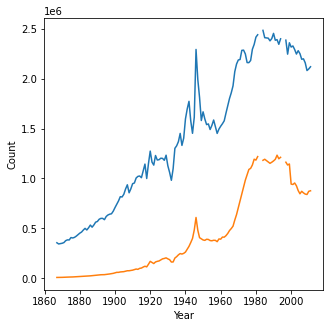

In [200]:
plt.figure(figsize=(5,5))

plt.plot(df['Year'],df['Marriages'],label='Marriages')
plt.plot(df['Year'],df['Divorces'],label='Divorces')

plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

Q.7. Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

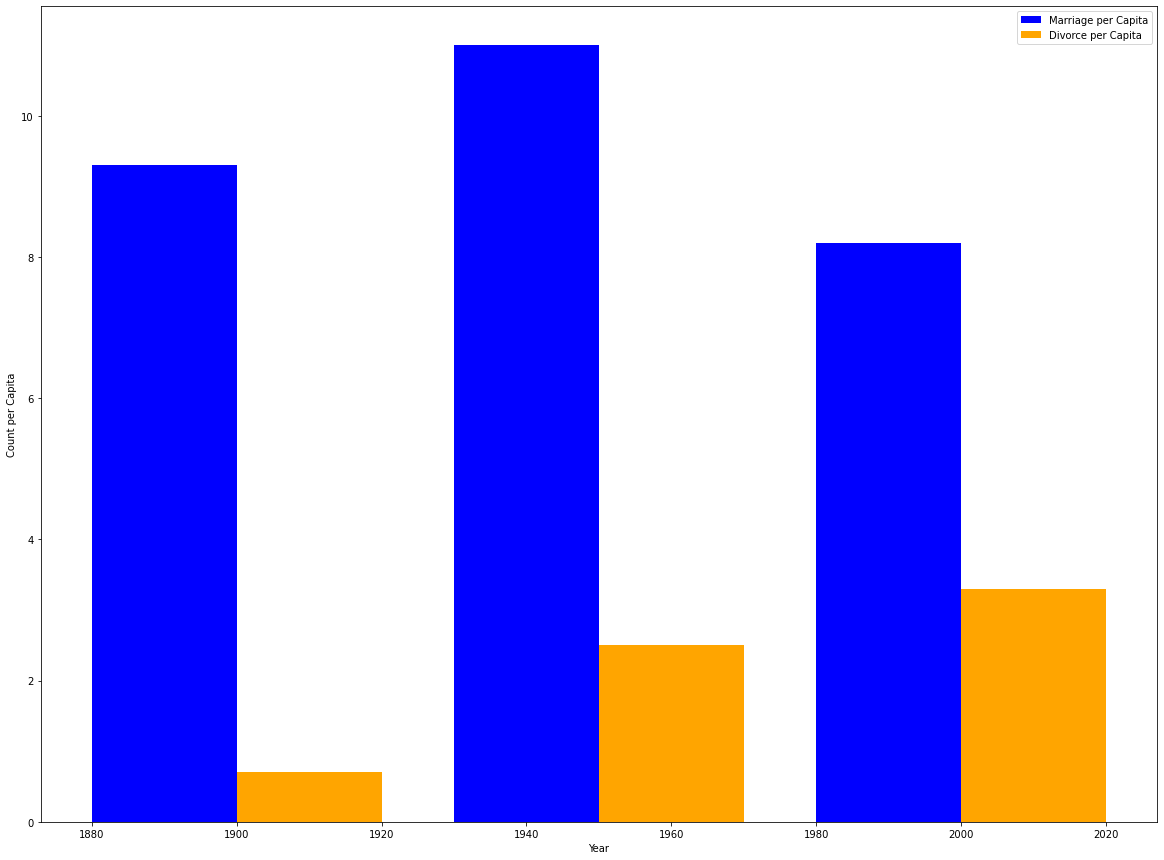

In [204]:
import pandas as pd

us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values
width = 20

plt.figure(figsize=(20,15))
plt.bar(x=(years - width/2), height=marriages_per_capita, color='blue', width=width, label='Marriage per Capita')
plt.bar(x=(years + width/2), height=divorces_per_capita, color='orange', width=width, label='Divorce per Capita')
plt.xlabel('Year')
plt.ylabel('Count per Capita')
plt.legend(loc='upper right')
plt.show()

Q.8. Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

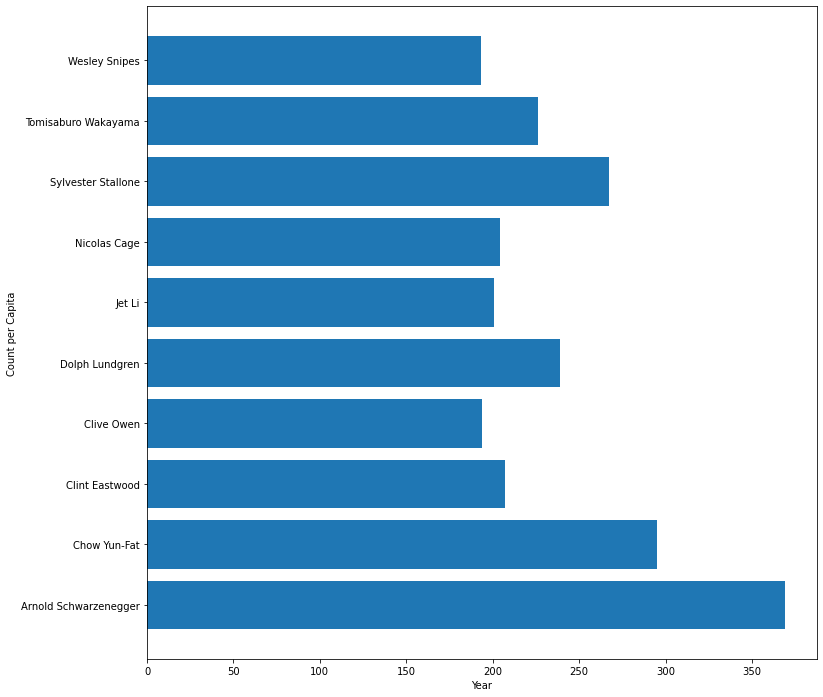

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
actor_names = hollywood_actor_kills['Actor'].values
kill_counts = hollywood_actor_kills['Count'].values

plt.figure(figsize=(12, 12))
plt.barh(actor_names, kill_counts)
plt.xlabel('Year')
plt.ylabel('Count per Capita')
plt.show()

Q.9. Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

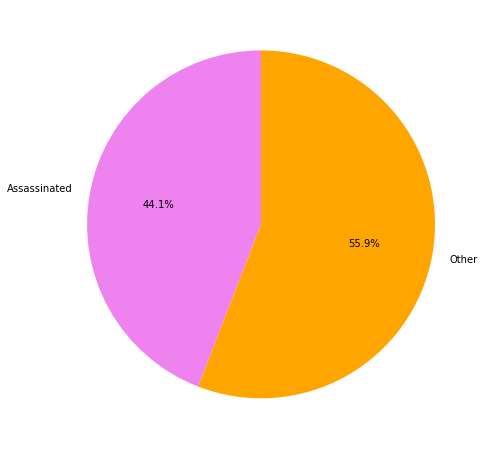

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors) - number_assassinated

plt.figure(figsize=(8, 8))
plt.pie([number_assassinated, other_deaths], colors=['violet', 'orange'], startangle=90, autopct='%2.1f%%', labels=['Assassinated', 'Other'])
plt.show()

Q.10. Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

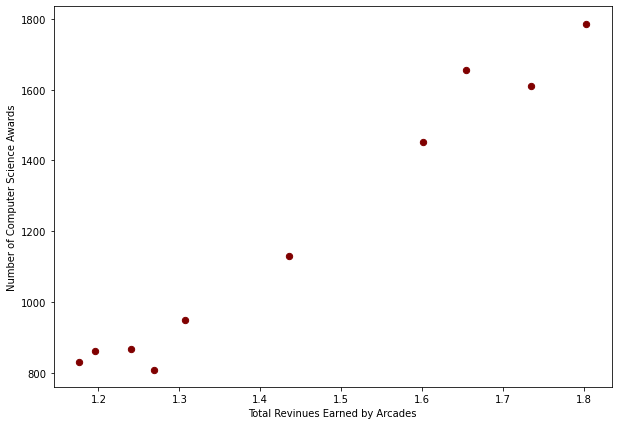

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_cs_doctorates['Computer Science Doctorates Awarded (US)'].values

plt.figure(figsize=(10, 7))
plt.scatter(arcade_revenue, cs_doctorates_awarded, c='maroon', s=40, marker='o')
plt.xlabel('Total Revinues Earned by Arcades')
plt.ylabel('Number of Computer Science Awards')
plt.show()